In [ ]:
# Import necessary libraries
import keras
from keras.datasets import cifar10  # CIFAR-10 dataset: 50,000 train and 10,000 test images of size 32x32
from keras.models import Sequential  # For creating sequential models
from keras import datasets, layers, models  # Additional Keras modules for model building
from keras.utils import to_categorical  # Utility for one-hot encoding
from keras import regularizers  # For adding regularization to the model
from keras.layers import Dense, Dropout, BatchNormalization  # Various layer types
import matplotlib.pyplot as plt  # Plotting library
import numpy as np  # Library for numerical operations
from keras.applications import VGG16  # Pretrained VGG16 model

In [ ]:
# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170498071/170498071 [==============================] - 10s 0us/step


In [ ]:
# Filtering out images of airplanes and ships
# In CIFAR-10, airplane is class 0 and ship is class 8
airplane_ship_train_mask = np.where((train_labels == 0) | (train_labels == 8))[0]
airplane_ship_test_mask = np.where((test_labels == 0) | (test_labels == 8))[0]

In [ ]:
# Apply the mask to filter the images and labels
train_images = train_images[airplane_ship_train_mask]
train_labels = train_labels[airplane_ship_train_mask]
test_images = test_images[airplane_ship_test_mask]
test_labels = test_labels[airplane_ship_test_mask]


# Checking the number of rows (records) and columns (features) after filtering
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(10000, 32, 32, 3)
(10000, 1)
(2000, 32, 32, 3)
(2000, 1)


In [ ]:
# # Checking the number of unique classes
# print(np.unique(train_labels))
# print(np.unique(test_labels))

# Change labels to 0 and 1 for binary classification
train_labels = np.where(train_labels == 0, 0, 1)
test_labels = np.where(test_labels == 0, 0, 1)

# Checking the number of rows (records) and columns (features) after filtering
print('Filtered training data shape:', train_images.shape)
print('Filtered training labels shape:', train_labels.shape)
print('Filtered testing data shape:', test_images.shape)
print('Filtered testing labels shape:', test_labels.shape)

Filtered training data shape: (10000, 32, 32, 3)
Filtered training labels shape: (10000, 1)
Filtered testing data shape: (2000, 32, 32, 3)
Filtered testing labels shape: (2000, 1)


In [ ]:
# Creating a list of class labels for binary classification (airplane and ship)
class_names = ['airplane', 'ship']

In [ ]:
# Convert the pixel values of images to float type for precision
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize the images to a range of 0 to 1 for better performance
train_images /= 255.0
test_images /= 255.0

# Number of classes in the CIFAR-10 dataset
num_classes = 10

# Apply one-hot encoding to the labels to convert them into binary class matrices
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [ ]:
def create_model(input_shape, num_classes):
    model = Sequential([
        layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.5),

        layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Define input shape and number of classes
input_shape = (32, 32, 3)
num_classes = 10

# Create the model
model = create_model(input_shape, num_classes)

# Checking the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [ ]:
# Define optimizer, loss function, and metrics using a dictionary
compile_options = {
    'optimizer': 'adam',
    'loss': keras.losses.categorical_crossentropy,
    'metrics': ['accuracy']
}

# Compile the model
model.compile(**compile_options)

In [ ]:
def train_model(model, train_images, train_labels, test_images, test_labels, batch_size=32, epochs=30, validation_split=0.2):
    history = model.fit(
        train_images, train_labels,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=validation_split
    )
    return history

# Train the model
training_history = train_model(model, train_images, train_labels, test_images, test_labels)


Epoch 1/30
250/250 [==============================] - 16s 12ms/step - loss: 1.6277 - accuracy: 0.5931 - val_loss: 1.0820 - val_accuracy: 0.5375
Epoch 2/30
250/250 [==============================] - 2s 8ms/step - loss: 0.6025 - accuracy: 0.7914 - val_loss: 0.4588 - val_accuracy: 0.8025
Epoch 3/30
250/250 [==============================] - 2s 8ms/step - loss: 0.4381 - accuracy: 0.8278 - val_loss: 0.2924 - val_accuracy: 0.8830
Epoch 4/30
250/250 [==============================] - 2s 9ms/step - loss: 0.3265 - accuracy: 0.8665 - val_loss: 0.2284 - val_accuracy: 0.9070
Epoch 5/30
250/250 [==============================] - 3s 11ms/step - loss: 0.2883 - accuracy: 0.8805 - val_loss: 0.2380 - val_accuracy: 0.9020
Epoch 6/30
250/250 [==============================] - 2s 8ms/step - loss: 0.2671 - accuracy: 0.8914 - val_loss: 0.4221 - val_accuracy: 0.8235
Epoch 7/30
250/250 [==============================] - 2s 8ms/step - loss: 0.2445 - accuracy: 0.9016 - val_loss: 0.1935 - val_accuracy: 0.9280
Epo

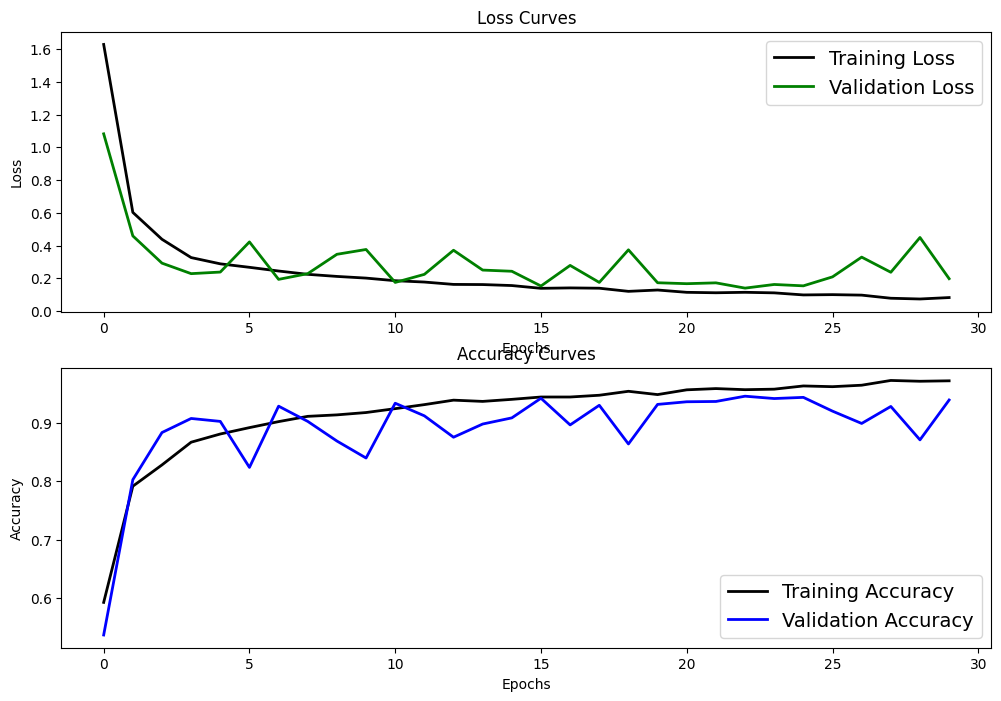

In [ ]:
# Create a figure with two subplots
plt.figure(figsize=[12, 8])

# Training history curve
plt.subplot(2, 1, 1)
plt.plot(training_history.history['loss'], 'black', linewidth=2.0)
plt.plot(training_history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Accuracy history curve
plt.subplot(2, 1, 2)
plt.plot(training_history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(training_history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)
plt.show()

In [ ]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

250/250 [==============================] - 1s 2ms/step
[[9.7288594e-06 8.4265976e-06 5.0272136e-10 ... 4.4738362e-11
  9.9998176e-01 1.0084941e-07]
 [3.7468001e-04 4.2070905e-03 1.2045092e-05 ... 2.5348524e-07
  9.9523395e-01 1.4241498e-04]
 [9.9172884e-01 2.5112150e-04 2.7472593e-04 ... 2.3095201e-06
  7.3692068e-03 3.6662677e-04]
 ...
 [3.3736032e-02 4.1711866e-04 1.1912019e-03 ... 4.1435999e-03
  9.4430202e-01 4.1332122e-04]
 [8.8790030e-04 9.9877697e-01 1.6855196e-05 ... 3.9932866e-06
  3.1175321e-06 2.4165526e-04]
 [9.2977723e-07 5.9523472e-06 1.1172441e-05 ... 9.9906021e-01
  1.4983208e-07 3.8396132e-07]]
[8 8 0 ... 8 1 7]


63/63 [==============================] - 0s 3ms/step


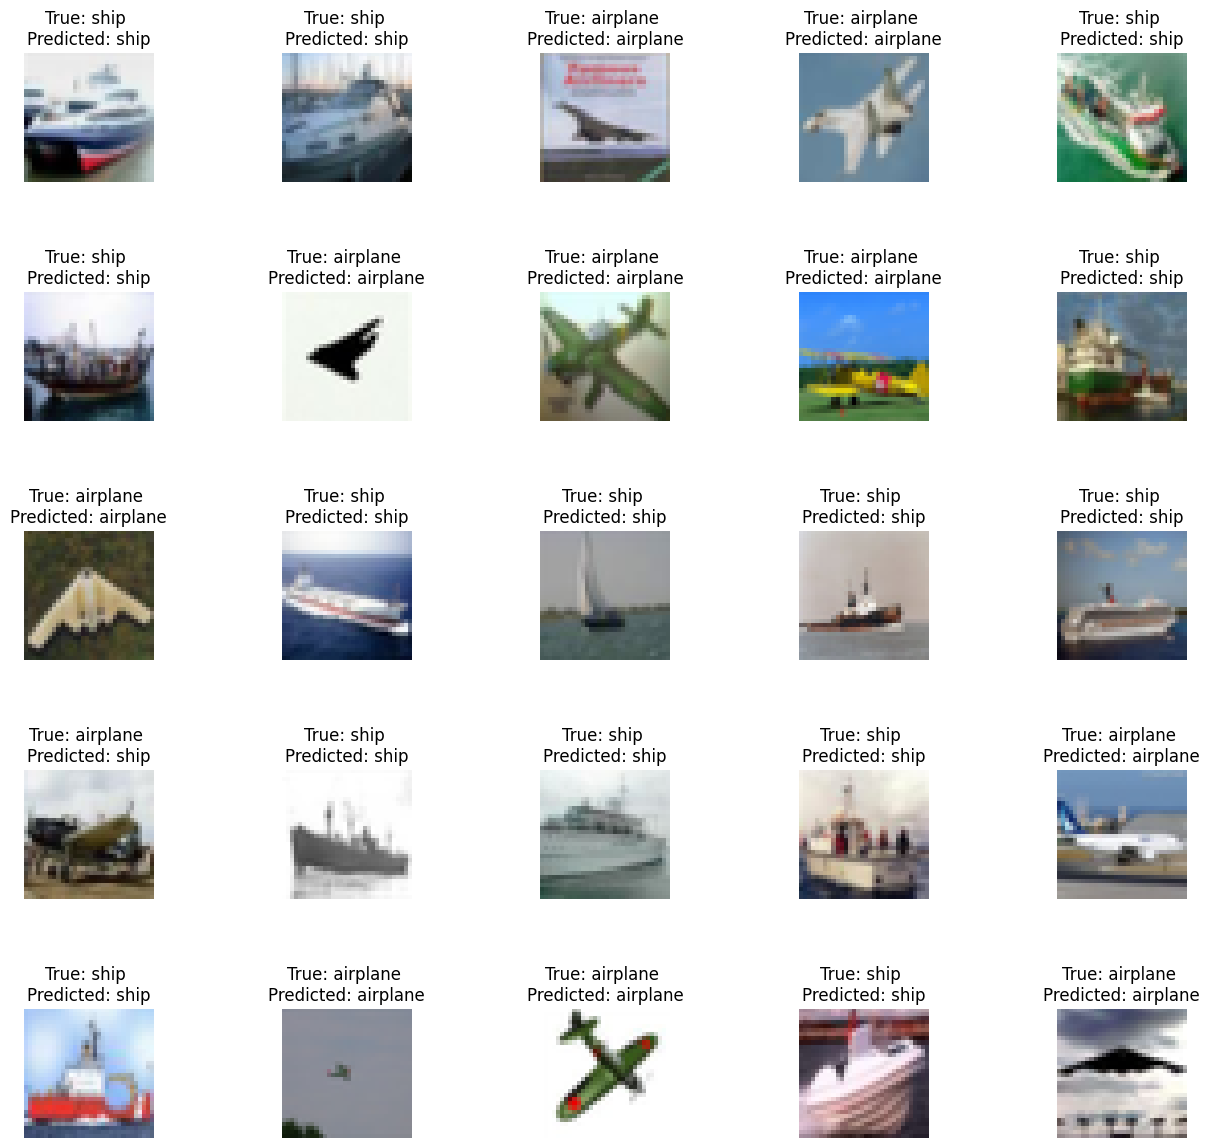

In [ ]:
# Making the Predictions
predictions = model.predict(test_images)


# Converting the predictions into label indices
predicted_classes = np.argmax(predictions, axis=1)

# Plotting the Actual vs. Predicted results

# Create a figure with a grid of 5x5 subplots
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through the first 25 test images
for i in np.arange(0, 25):
    # Display the image in the subplot
    axes[i].imshow(test_images[i])

    # Set the title of the subplot to show the true and predicted class labels
    axes[i].set_title("True: %s \nPredicted: %s" % (
        class_names[np.argmax(test_labels[i])],  # True label
        class_names[predicted_classes[i]]        # Predicted label
    ))

    # Remove the axis to make the plot cleaner
    axes[i].axis('off')

# Adjust the spacing between subplots for better layout
plt.subplots_adjust(wspace=1)

# Display the plot
plt.show()


# Pre-Trained Model

In [ ]:
from keras.applications import ResNet50
from keras import Model
from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization

# Load the ResNet50 model, excluding the top layers, and using input shape as CIFAR-10 images
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers so they won't be trained
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)


94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
# Compile the model with appropriate optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
# Train the model with training data
history = model.fit(train_images, train_labels, batch_size=32, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
313/313 [==============================] - 5s 15ms/step - loss: 0.4983 - accuracy: 0.7614 - val_loss: 1.5848 - val_accuracy: 0.5035
Epoch 2/10
313/313 [==============================] - 4s 12ms/step - loss: 0.4969 - accuracy: 0.7735 - val_loss: 3.4085 - val_accuracy: 0.5000
Epoch 3/10
313/313 [==============================] - 4s 13ms/step - loss: 0.4834 - accuracy: 0.7745 - val_loss: 0.7449 - val_accuracy: 0.6550
Epoch 4/10
313/313 [==============================] - 5s 15ms/step - loss: 0.4746 - accuracy: 0.7805 - val_loss: 2.9327 - val_accuracy: 0.5000
Epoch 5/10
313/313 [==============================] - 4s 13ms/step - loss: 0.4684 - accuracy: 0.7842 - val_loss: 2.5293 - val_accuracy: 0.5010
Epoch 6/10
313/313 [==============================] - 4s 13ms/step - loss: 0.4675 - accuracy: 0.7821 - val_loss: 0.6293 - val_accuracy: 0.7135
Epoch 7/10
313/313 [==============================] - 5s 15ms/step - loss: 0.4645 - accuracy: 0.7833 - val_loss: 2.3514 - val_accuracy: 0.5045

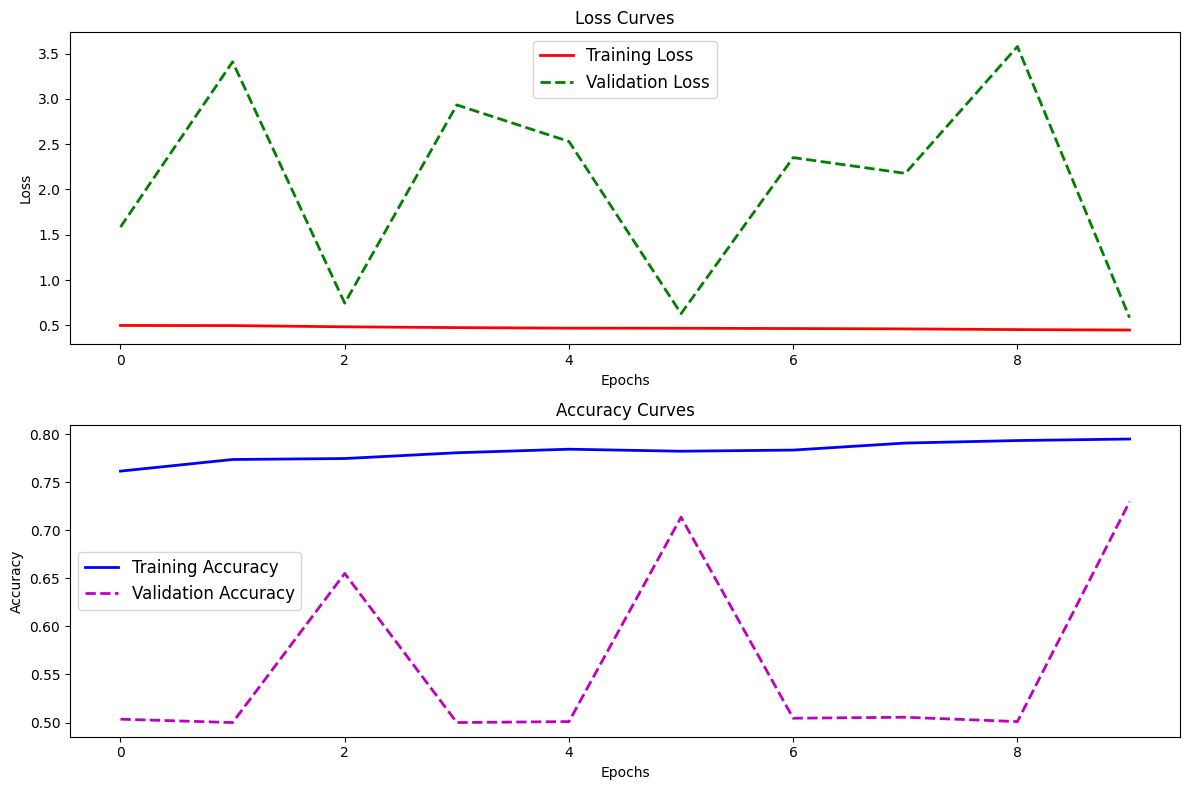

In [ ]:
# Create a figure with two subplots for the training and validation curves
plt.figure(figsize=[12, 8])

# Training Loss curve
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], 'r-', linewidth=2.0)
plt.plot(history.history['val_loss'], 'g--', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Training Accuracy curve
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], 'b-', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'm--', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


63/63 [==============================] - 2s 10ms/step
[[1.6107930e-01 8.3889443e-01 2.9229539e-06 ... 7.3783181e-06
  4.6725930e-07 2.0762020e-06]
 [1.1546674e-01 8.8452053e-01 2.2266740e-06 ... 2.6971964e-06
  2.0565213e-07 1.2053604e-06]
 [6.2385774e-01 3.7613457e-01 8.5745825e-07 ... 1.2811633e-06
  5.5130187e-08 6.3064527e-07]
 ...
 [4.4845581e-01 5.5153960e-01 1.4777723e-06 ... 2.8366543e-07
  1.1404678e-08 3.8600319e-07]
 [7.9543734e-01 2.0453824e-01 1.9335716e-06 ... 1.9681383e-06
  2.6524015e-07 3.1168533e-06]
 [7.7363062e-01 2.2636929e-01 3.1829765e-09 ... 1.9703826e-08
  6.3999042e-11 2.0812303e-08]]
[1 1 0 ... 1 0 0]


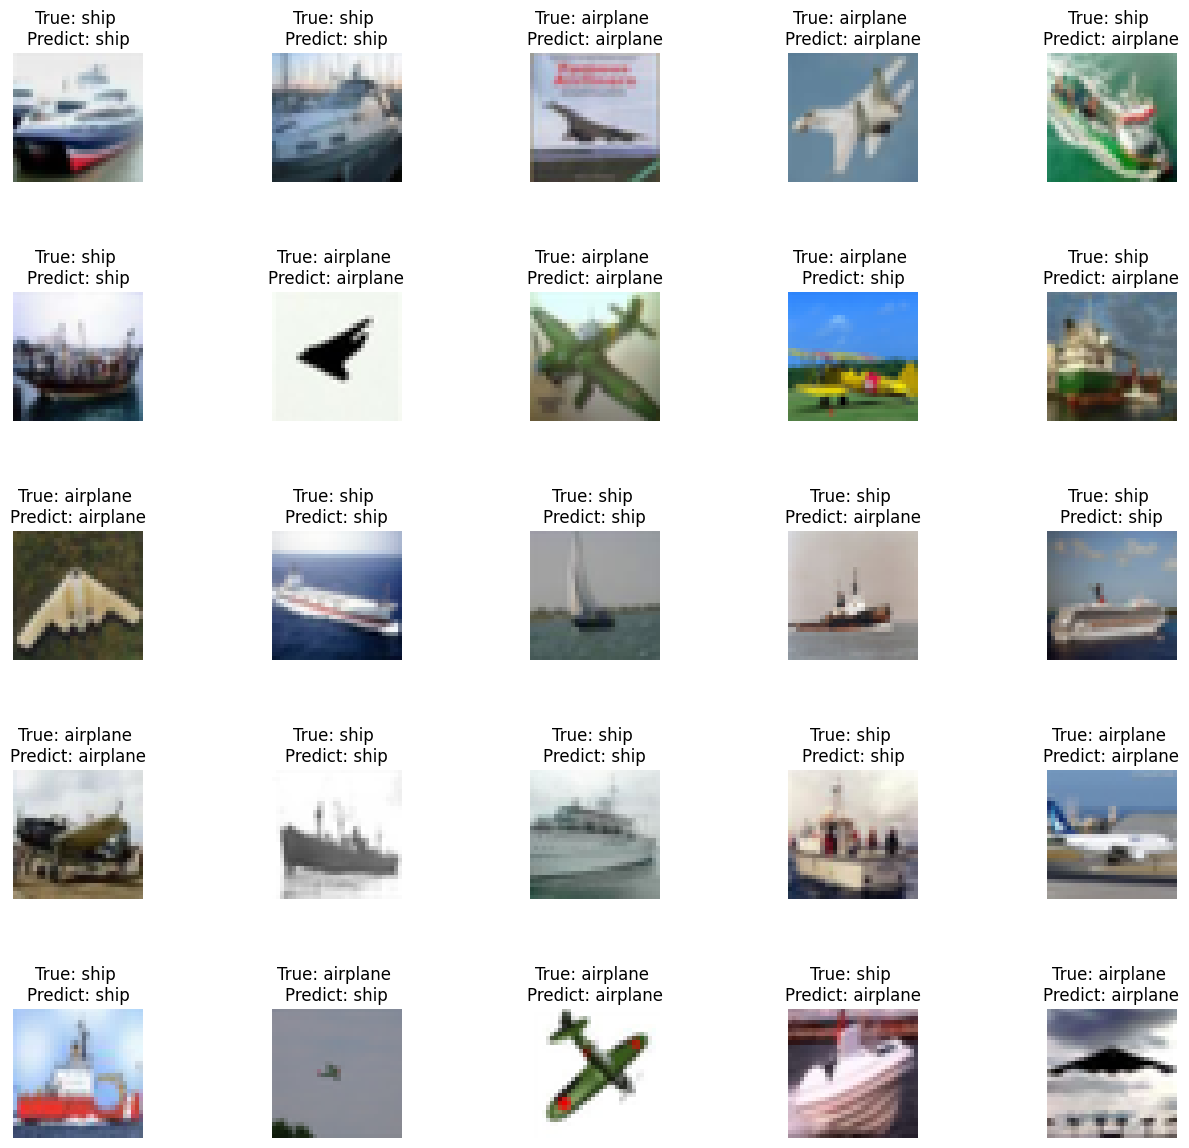

In [ ]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

# Plotting the Actual vs. Predicted results

# Create a figure with a grid of 5x5 subplots
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()  # Flatten the 2D array of axes to 1D for easy iteration

# Loop through the first 25 test images
for i in np.arange(0, 25):
    # Display the image in the subplot
    axes[i].imshow(test_images[i])

    # Set the title of the subplot to show the true and predicted class labels
    axes[i].set_title("True: %s \nPredict: %s" % (
        class_names[np.argmax(test_labels[i])],  # True label
        class_names[pred_classes[i]]             # Predicted label
    ))

    # Remove the axis to make the plot cleaner
    axes[i].axis('off')

# Adjust the spacing between subplots for better layout
plt.subplots_adjust(wspace=1)

# Display the plot
plt.show()